In [1]:
import warnings
warnings.filterwarnings('ignore')

Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Loading the Dataset

In [3]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
l1=[] # categorical
l2=[] # int
for i in list(df.columns):
    if df[i].dtype==object:
        l1.append(i)
    else:
        l2.append(i)

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking Null Values

In [7]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<Axes: >

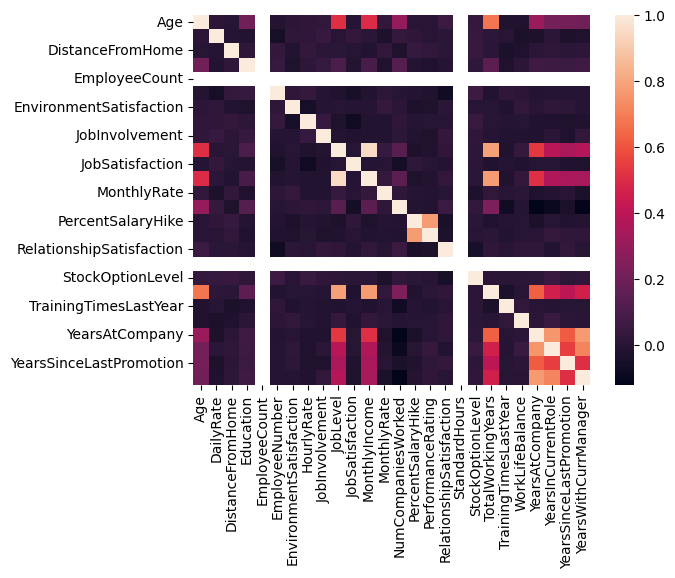

In [10]:
sns.heatmap(df.corr(numeric_only=True))

Outlier Detection

<Axes: >

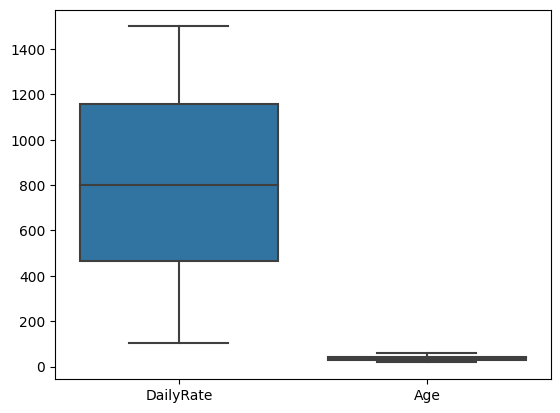

In [11]:
sns.boxplot(df[['DailyRate','Age']])

<Axes: >

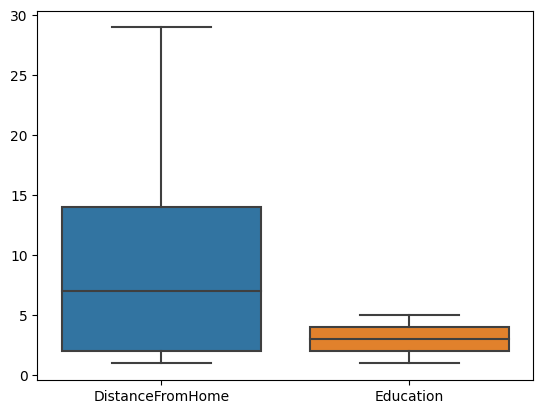

In [12]:
sns.boxplot(df[['DistanceFromHome','Education']])

<Axes: >

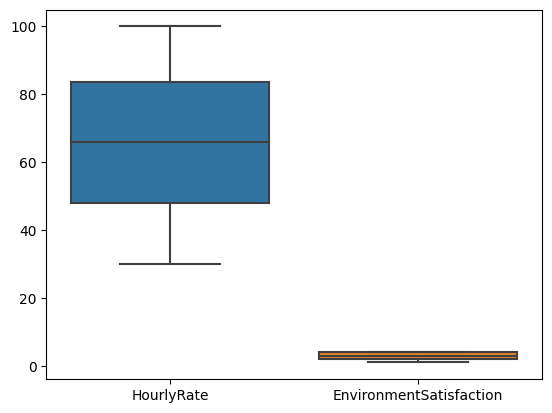

In [13]:
sns.boxplot(df[['HourlyRate','EnvironmentSatisfaction']])

<Axes: >

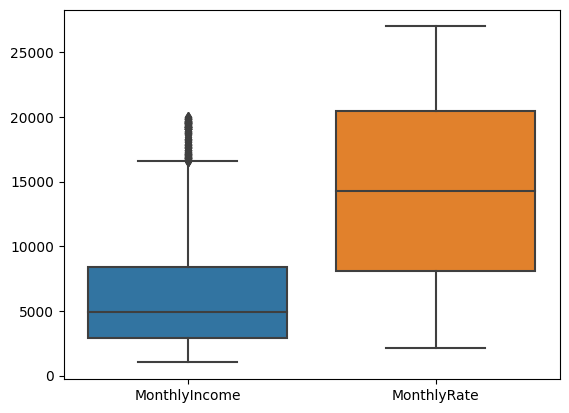

In [14]:
sns.boxplot(df[['MonthlyIncome','MonthlyRate']])

<Axes: >

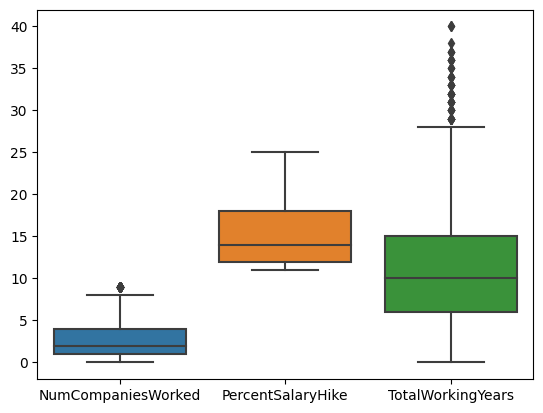

In [15]:
sns.boxplot(df[['NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears']])

<Axes: >

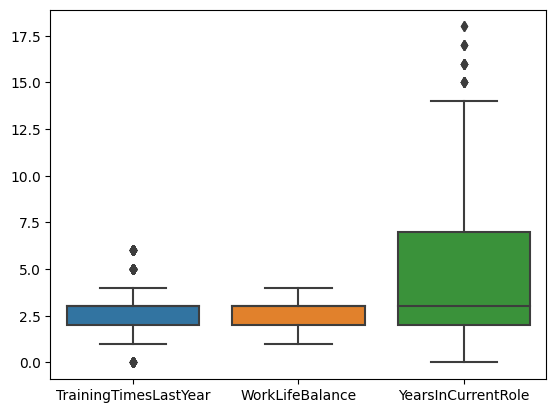

In [16]:
sns.boxplot(df[['TrainingTimesLastYear','WorkLifeBalance','YearsInCurrentRole']])

<Axes: >

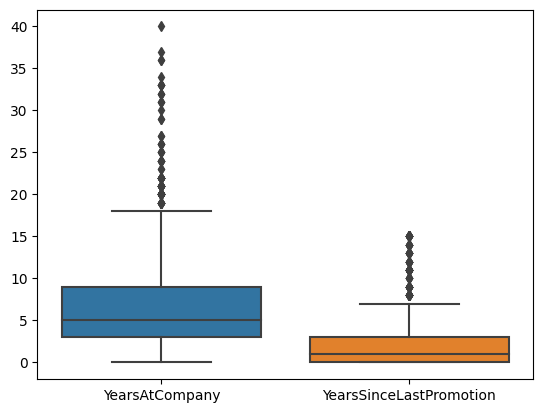

In [17]:
sns.boxplot(df[['YearsAtCompany','YearsSinceLastPromotion']])

<Axes: >

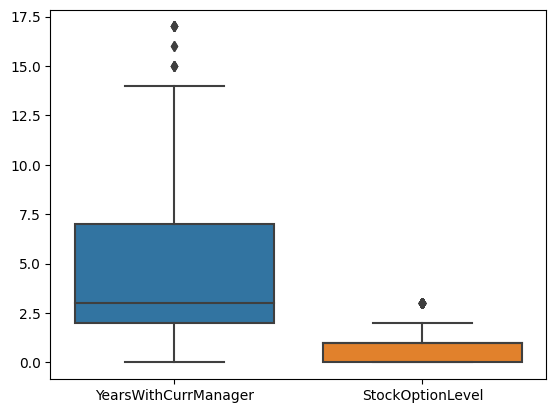

In [18]:
sns.boxplot(df[['YearsWithCurrManager','StockOptionLevel']])

In [19]:
l=['MonthlyIncome' , 'NumCompaniesWorked' , 'TotalWorkingYears' , 'YearsAtCompany' , 'YearsWithCurrManager' , 'YearsSinceLastPromotion']

In [20]:
for i in l:
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    iqr = q3 - q1
    upper_lm =  q3 + ( 1.5 * iqr )
    lower_lm = q1 - ( 1.5 * iqr )
    df[i]=np.where(df[i]>upper_lm,upper_lm,np.where(df[i]<lower_lm,lower_lm,df[i]))


Separating Dependent and Independent variables

In [21]:
X=df.drop(columns=['Attrition'])
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8.0,0,1,6.0,4,0.0,5.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10.0,3,3,10.0,7,1.0,7.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7.0,3,3,0.0,0,0.0,0.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8.0,3,3,8.0,7,3.0,0.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6.0,3,3,2.0,2,2.0,2.0


In [22]:
y=df[['Attrition']]
y.head()

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No


Performing Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
X['BusinessTravel']=le.fit_transform(X['BusinessTravel'])
X['Department']=le.fit_transform(X['Department'])
X['EducationField']=le.fit_transform(X['EducationField'])
X['Gender']=le.fit_transform(X['Gender'])
X['JobRole']=le.fit_transform(X['JobRole'])
X['MaritalStatus']=le.fit_transform(X['MaritalStatus'])
X['Over18']=le.fit_transform(X['Over18'])
X['OverTime']=le.fit_transform(X['OverTime'])

In [25]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8.0,0,1,6.0,4,0.0,5.0
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10.0,3,3,10.0,7,1.0,7.0
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7.0,3,3,0.0,0,0.0,0.0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8.0,3,3,8.0,7,3.0,0.0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6.0,3,3,2.0,2,2.0,2.0


Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [27]:
X


array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.77613851,  0.25382347],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.37248608,  0.82260471],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.77613851, -1.16812965],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.77613851, -0.31495778],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.77613851,  1.10699534],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.37248608, -0.5993484 ]])

In [28]:
y

,Attrition
0,Yes
1,No
2,Yes
3,No
4,No
...,...
1465,No
1466,No
1467,No
1468,No


Splitting into Training and Testing Data

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1176, 34), (294, 34), (1176, 1), (294, 1))

Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred=reg.predict(X_test)

In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.98      0.93       245
         Yes       0.81      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.85      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294



In [35]:
confusion_matrix(y_test,y_pred)

array([[241,   4],
       [ 32,  17]], dtype=int64)

Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred=clf.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.88      0.82      0.85       245
         Yes       0.33      0.43      0.37        49

    accuracy                           0.76       294
   macro avg       0.60      0.63      0.61       294
weighted avg       0.79      0.76      0.77       294



In [39]:
confusion_matrix(y_test,y_pred)

array([[202,  43],
       [ 28,  21]], dtype=int64)

HyperParameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV
param={
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[x for x in range(8)],
    'max_features':['auto','sqrt','log2']
}
grid=GridSearchCV(estimator=clf,param_grid=param,scoring='accuracy',cv=5)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [41]:
y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.84      0.98      0.90       245
         Yes       0.33      0.04      0.07        49

    accuracy                           0.83       294
   macro avg       0.59      0.51      0.49       294
weighted avg       0.75      0.83      0.77       294



In [42]:
confusion_matrix(y_test,y_pred)

array([[241,   4],
       [ 47,   2]], dtype=int64)

Random Forests

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier()
clf2.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
y_pred=clf2.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.99      0.92       245
         Yes       0.75      0.12      0.21        49

    accuracy                           0.85       294
   macro avg       0.80      0.56      0.56       294
weighted avg       0.83      0.85      0.80       294



In [46]:
confusion_matrix(y_test,y_pred)

array([[243,   2],
       [ 43,   6]], dtype=int64)